In [2]:
# Import external script
%run models.py

In [3]:
# Import data from CSV
fdata = pd.read_csv('data_histories.csv', index_col="dp_folio")
fdata.head()

,id_sexo,Aedad,AAedad,Apuesto,id_gestud,AIMC,fuma,fuma_act,ejer_act,ejer1,...,locout5,locout10,locout20,locout30,rest_act,rest1,rest5,rest10,rest20,rest30
dp_folio,,,,,,,,,,,,,,,,,,,,,
1,F,51,6,Admin,CarTec,4,1,3,0,2,...,1,1,1,1,0,0,0,0,0,0
2,F,38,4,Sec,Bach,3,2,-1,0,0,...,0,0,0,0,1,3,0,0,0,0
3,F,34,3,Int,Sec,5,1,1,0,0,...,1,-1,-1,-1,0,0,0,-1,-1,-1
4,M,63,8,Jef,CarTec,4,2,-1,2,2,...,0,0,0,-1,0,0,0,0,0,0
5,M,42,4,EM,Sec,3,1,2,2,2,...,0,0,0,0,0,0,0,0,0,0


In [4]:
pm = ProbModel()

In [403]:
# Clusterize between obese and non obese
obesity = {0:[1,2,3], 1:[4,5,6]}
ndata = pm.clusterize_discrete("AIMC", obesity, "obesity", fdata)

# Clusterize between degrees of study (higher degree vs. non higher degree)
degree = {0:["Prim", "Sec", "Bach", "CarTec", "Otro"], 1:["Lic", "Mast", "Doc", "PDoc"]}
ndata = pm.clusterize_discrete("id_gestud", degree, "hdegree", ndata)

# Clusterize job features
academic = {0:["Admin", "Asi", "Coo", "E", "ED", "EM", "Int", "Jef", "Lab", "Sec", "Tec", "Vig"], 1:["Acade", "Inv", "InvE"]}
ndata = pm.clusterize_discrete("Apuesto", academic, "academic", ndata)

# Clusterize age features
age = {0:"between(15.0, 28.0)", 1:"between(28.1, 40.0)", 2:"between(40.1, 60.0)", 3:"between(60.1, 90.0)"}
ndata = pm.clusterize_continuous("Aedad", age, "AedadC", ndata)

# Clusterize excercise features
ejer = {"A":"greatereq_than(2.5)", "B":"less_than(2.5)"}
ndata = pm.clusterize_continuous("ejer_act", ejer, "ejer0B", ndata)
ndata = pm.clusterize_continuous("ejer1", ejer, "ejer1B", ndata)
ndata = pm.clusterize_continuous("ejer5", ejer, "ejer5B", ndata)
ndata = pm.clusterize_continuous("ejer10", ejer, "ejer10B", ndata)
ndata = pm.clusterize_continuous("ejer20", ejer, "ejer20B", ndata)
ndata = pm.clusterize_continuous("ejer30", ejer, "ejer30B", ndata)

# Clusterize stress features
estres = {"A":[4,5], "B":[1,2,3]}
ndata = pm.clusterize_discrete("estres_act", estres, "estres0B", ndata)
ndata = pm.clusterize_discrete("estres1", estres, "estres1B", ndata)
ndata = pm.clusterize_discrete("estres5", estres, "estres5B", ndata)
ndata = pm.clusterize_discrete("estres10", estres, "estres10B", ndata)
ndata = pm.clusterize_discrete("estres20", estres, "estres20B", ndata)
ndata = pm.clusterize_discrete("estres30", estres, "estres30B", ndata)

# Clusterize weight features
peso = {"A":[1,2,3], "B":[4,5]}
ndata = pm.clusterize_discrete("peso_act", peso, "peso0B", ndata)
ndata = pm.clusterize_discrete("peso1", peso, "peso1B", ndata)
ndata = pm.clusterize_discrete("peso5", peso, "peso5B", ndata)
ndata = pm.clusterize_discrete("peso10", peso, "peso10B", ndata)
ndata = pm.clusterize_discrete("peso20", peso, "peso20B", ndata)
ndata = pm.clusterize_discrete("peso30", peso, "peso30B", ndata)

# Clusterize weight features
condi = {"A":[4,5], "B":[1,2,3]}
ndata = pm.clusterize_discrete("condi_act", condi, "condi0B", ndata)
ndata = pm.clusterize_discrete("condi1", condi, "condi1B", ndata)
ndata = pm.clusterize_discrete("condi5", condi, "condi5B", ndata)
ndata = pm.clusterize_discrete("condi10", condi, "condi10B", ndata)
ndata = pm.clusterize_discrete("condi20", condi, "condi20B", ndata)
ndata = pm.clusterize_discrete("condi30", condi, "condi30B", ndata)

# Clusterize health features
health = {"A":[4,5], "B":[1,2,3]}
ndata = pm.clusterize_discrete("salud_act", health, "salud0B", ndata)
ndata = pm.clusterize_discrete("salud1", health, "salud1B", ndata)
ndata = pm.clusterize_discrete("salud5", health, "salud5B", ndata)
ndata = pm.clusterize_discrete("salud10", health, "salud10B", ndata)
ndata = pm.clusterize_discrete("salud20", health, "salud20B", ndata)
ndata = pm.clusterize_discrete("salud30", health, "salud30B", ndata)

ndata = pm.group_list_of_variables(["ejer0B", "ejer1B", "ejer5B", "ejer10B", "ejer20B", "ejer30B"], "ejer0_30", ndata)
ndata = pm.group_list_of_variables(["estres0B", "estres1B", "estres5B", "estres10B", "estres20B", "estres30B"], "estres0_30", ndata)
ndata = pm.group_list_of_variables(["condi0B", "condi1B", "condi5B", "condi10B", "condi20B", "condi30B"], "condi0_30", ndata)
ndata = pm.group_list_of_variables(["salud0B", "salud1B", "salud5B", "salud10B", "salud20B", "salud30B"], "salud0_30", ndata)
ndata = pm.group_list_of_variables(["peso0B", "peso1B", "peso5B", "peso10B", "peso20B", "peso30B"], "peso0_30", ndata)

selected_features = ["ejer0_30", "estres0_30", "condi0_30", "salud0_30", "peso0_30", "obesity", "hdegree", "academic", "id_sexo", "Apuesto", "AedadC"]
sdata = ndata[selected_features]
sdata.head()

,ejer0_30,estres0_30,condi0_30,salud0_30,peso0_30,obesity,hdegree,academic,id_sexo,Apuesto,AedadC
dp_folio,,,,,,,,,,,
1,BBBBBA,ABANNB,BAAAAA,AAAAAA,BAAAAB,1,0,0,F,Admin,2
2,BBAAAB,BBABBB,AAAAAA,AABAAA,BABAAA,0,0,0,F,Sec,1
3,BBBANN,AAAABN,BBBBAN,BBAAAN,BBBBAN,1,0,0,F,Int,1
4,BBAAAA,BABBBN,BBAAAA,AAAAAA,BBAAAA,1,0,0,M,Jef,3
5,BBBBBB,BBBANN,BBAANN,AABBNN,AAAANN,0,0,0,M,EM,2


In [489]:
pm.get_nx("estres_act", 3, ndata)

TypeError: get_epsilon() missing 5 required positional arguments: 'feature', 'category', 'classFeature', 'classCategory', and 'data'

In [708]:
pm.get_cond_prob_full("ejer0B", "B", "ejer1B", "B", ndata)

{'P': 0.837171052631579, 'nx': 608, 'ncx': 509}

In [709]:
ndata[ndata.ejer10B != "N"]

,id_sexo,Aedad,AAedad,Apuesto,id_gestud,AIMC,fuma,fuma_act,ejer_act,ejer1,...,salud1B,salud5B,salud10B,salud20B,salud30B,ejer0_30,estres0_30,condi0_30,salud0_30,peso0_30
dp_folio,,,,,,,,,,,,,,,,,,,,,
1,F,51,6,Admin,CarTec,4,1,3,0,2,...,A,A,A,A,A,BBBBBA,ABANNB,BAAAAA,AAAAAA,BAAAAB
2,F,38,4,Sec,Bach,3,2,-1,0,0,...,A,B,A,A,A,BBAAAB,BBABBB,AAAAAA,AABAAA,BABAAA
3,F,34,3,Int,Sec,5,1,1,0,0,...,B,A,A,A,N,BBBANN,AAAABN,BBBBAN,BBAAAN,BBBBAN
4,M,63,8,Jef,CarTec,4,2,-1,2,2,...,A,A,A,A,A,BBAAAA,BABBBN,BBAAAA,AAAAAA,BBAAAA
5,M,42,4,EM,Sec,3,1,2,2,2,...,A,B,B,N,N,BBBBBB,BBBANN,BBAANN,AABBNN,AAAANN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,F,43,5,Acade,Lic,4,2,-1,2,0,...,A,A,A,A,A,BBBAAA,AAABBB,BBBAAA,AAAAAA,BBBAAA
1077,F,56,7,Jef,Sec,3,2,-1,4,4,...,A,A,A,A,A,AABBBA,ABBBBB,BBBBBA,AAAAAA,BBAAAA
1078,M,63,8,Acade,Mast,3,1,2,2,3,...,A,A,A,A,A,BAAAAA,BBBBBB,AAAAAA,AAAAAA,BAAAAA


In [711]:
pm.get_epsilon("ejer0_30", "BB*A**", "obesity", 1, ndata[ndata.ejer10B != "N"])

{'feat': 'ejer0_30',
 'cat': 'BB*A**',
 'class': 'obesity',
 'classcat': 1,
 'epsilon': 3.6619415105304842,
 'nx': 219,
 'ncx': 68,
 'nc': 225}

In [691]:
for index in ndata.index:
    if pm.match_structure(ndata.loc[index]["ejer0_30"], "A*A*BB"):
        print(str(index) + " " + str(ndata.loc[index]["ejer0_30"]) + " ")

9 AAABBB 
18 ABABBB 
30 AAAABB 
53 AAAABB 
66 AAAABB 
117 AAABBB 
137 AAAABB 
159 AAAABB 
170 AAAABB 
174 AAAABB 
183 ABABBB 
270 AAABBB 
272 AAABBB 
294 ABAABB 
312 AAAABB 
330 AAAABB 
354 AAABBB 
356 AAAABB 
418 AAABBB 
454 AAAABB 
466 AAAABB 
577 AAABBB 
579 AAAABB 
614 AAAABB 
662 AAAABB 
669 AAAABB 
691 AAABBB 
698 ABAABB 
712 AAAABB 
741 ABABBB 
760 AAAABB 
783 AAAABB 
822 AAAABB 
882 AAAABB 
922 AAAABB 
930 AAABBB 
994 ABABBB 
1011 ABABBB 
1026 AAABBB 
1052 AAAABB 
1068 AAAABB 


In [321]:
good_preservation0_30 = ["*****A", "****AA", "***AAA", "**AAAA", "*AAAAA", "AAAAAA"]
good_preservation0_20 = ["****A*", "***AA*", "**AAA*", "*AAAA*", "AAAAA*"]
good_preservation0_10 = ["***A**", "**AA**", "*AAA**", "AAAA**"]

In [322]:
bad_preservation0_30 = ["*****B", "****BB", "***BBB", "**BBBB", "*BBBBB", "BBBBBB"]
bad_preservation0_20 = ["****B*", "***BB*", "**BBB*", "*BBBB*", "BBBBB*"]
bad_preservation0_10 = ["***B**", "**BB**", "*BBB**", "BBBB**"]

In [323]:
levels = ["30 years", "20 years", "10 years", "5 years", "1 year", "Today"]

In [325]:
from plotly import graph_objects as go

In [384]:
def get_funnel(model, history, patterns, levels, name, data):
    numbers = []
    stages = []
    temp = levels.copy() 
    for pattern in patterns:
        numbers.append(model.get_nx(history, pattern, data))
        stages.append(temp.pop())
    stages.reverse()
    funnel = go.Funnel(
        name = name,
        y=stages, 
        x=numbers, 
        textinfo="value+percent previous+percent initial")
    return funnel

In [394]:
fig = go.Figure()
fig.add_trace(get_funnel(pm, "peso0_30", good_preservation0_10, levels, "A", sdata))
fig.add_trace(get_funnel(pm, "peso0_30", bad_preservation0_10, levels, "B", sdata))

In [385]:
fig = go.Figure()
fig.add_trace(get_funnel(pm, "peso0_30", bad_preservation0_10, levels, "non_academic", sdata[sdata.academic==0]))
fig.add_trace(get_funnel(pm, "peso0_30", bad_preservation0_10, levels, "academic", sdata[sdata.academic==1]))

In [13]:
data = dict(
    levels = ["30 years", "20 years", "10 years", "5 years", "1 year", "Today"],
    numbers = [317, 277, 232, 184, 123, 89]
)

estres20
1    291
2    326
3    203
4     81
5     27
6      6
7    139
8      3
Name: estres20, dtype: int64


<AxesSubplot:title={'center':'Distribución de la Población - (Edad)'}, ylabel='estres20'>

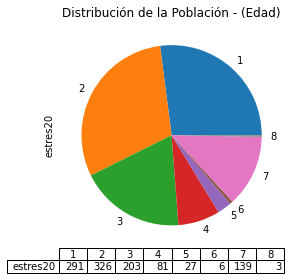

In [490]:
query = "estres20"
print(ndata.groupby(query)[query].count())
ndata.groupby(query)[query].count().plot(kind="pie", title="Distribución de la Población - (Edad)", table=True)

In [40]:
test = pd.read_csv("tp_condi_all.csv")

<AxesSubplot:xlabel='years', ylabel='probs'>

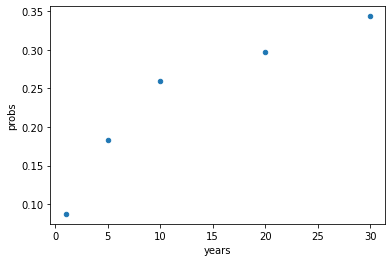

In [64]:
buf[buf.pattern == "B->A"].plot.scatter(x="years", y="probs")

In [440]:
test[test.pattern=="A->A"]

,labels,nobese,pattern,obese
0,a_20: A | a_30: A,0.946903,A->A,0.938776
4,a_10: A | a_30: A,0.818584,A->A,0.809524
8,a_10: A | a_20: A,0.862013,A->A,0.841530
12,a_5: A | a_30: A,0.681416,A->A,0.523810
16,a_5: A | a_20: A,0.714286,A->A,0.535519
20,a_5: A | a_10: A,0.794207,A->A,0.642424
24,a_1: A | a_30: A,0.502212,A->A,0.292517
28,a_1: A | a_20: A,0.487013,A->A,0.284153
32,a_1: A | a_10: A,0.515244,A->A,0.339394
36,a_1: A | a_5: A,0.614414,A->A,0.472727


In [445]:
test.loc[[0,8,20,36,56]]

,labels,nobese,pattern,obese
0,a_20: A | a_30: A,0.946903,A->A,0.938776
8,a_10: A | a_20: A,0.862013,A->A,0.841530
20,a_5: A | a_10: A,0.794207,A->A,0.642424
36,a_1: A | a_5: A,0.614414,A->A,0.472727
56,a_0: A | a_1: A,0.810127,A->A,0.612903


In [220]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

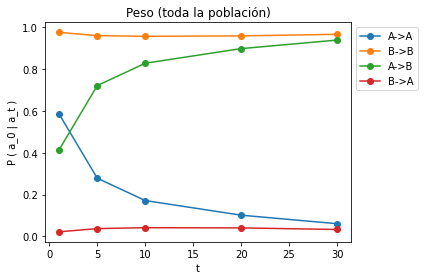

In [231]:
x = [30, 20, 10, 5, 1]
name = "Peso"
filename = "tp_peso_all"
tp = pd.read_csv(filename + ".csv")
plt.plot(x, tp[40:][tp.pattern == "A->A"]["probs"], marker="o", label="A->A")
plt.plot(x, tp[40:][tp.pattern == "B->B"]["probs"], marker="o", label="B->B")
plt.plot(x, tp[40:][tp.pattern == "A->B"]["probs"], marker="o", label="A->B")
plt.plot(x, tp[40:][tp.pattern == "B->A"]["probs"], marker="o", label="B->A")
plt.ylabel("P ( a_0 | a_t )")
plt.xlabel("t")
plt.legend(bbox_to_anchor=(1., 1.), loc="upper left")
plt.title(label=name + " (toda la población)")
plt.savefig("images/" + filename + ".png")

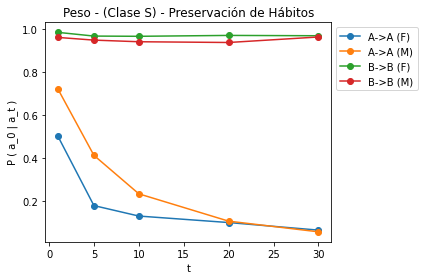

In [290]:
x = [30, 20, 10, 5, 1]
name = "Peso - (Clase S)"
filename = "tp_peso_female_vs_male"
var1 = "F"
var2 = "M"
l1 = "(F)"
l2 = "(M)"
tp = pd.read_csv(filename + ".csv")
plt.plot(x, tp[40:][tp.pattern == "A->A"][var1], marker="o", label="A->A " + l1)
plt.plot(x, tp[40:][tp.pattern == "A->A"][var2], marker="o", label="A->A " + l2)
plt.plot(x, tp[40:][tp.pattern == "B->B"][var1], marker="o", label="B->B " + l1)
plt.plot(x, tp[40:][tp.pattern == "B->B"][var2], marker="o", label="B->B " + l2)
plt.legend(bbox_to_anchor=(1., 1.), loc="upper left")
plt.ylabel("P ( a_0 | a_t )")
plt.xlabel("t")
plt.title(label=name + " - Preservación de Hábitos")
plt.savefig("images/" + filename + "_preservation.png")

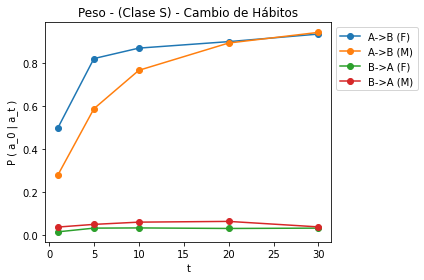

In [291]:
plt.plot(x, tp[40:][tp.pattern == "A->B"][var1], marker="o", label="A->B " + l1)
plt.plot(x, tp[40:][tp.pattern == "A->B"][var2], marker="o", label="A->B " + l2)
plt.plot(x, tp[40:][tp.pattern == "B->A"][var1], marker="o", label="B->A " + l1)
plt.plot(x, tp[40:][tp.pattern == "B->A"][var2], marker="o", label="B->A " + l2)
plt.legend(bbox_to_anchor=(1., 1.), loc="upper left")
plt.ylabel("P ( a_0 | a_t )")
plt.xlabel("t")
plt.title(label=name + " - Cambio de Hábitos")
plt.savefig("images/" + filename + "_change.png")

### Epsilons Sumamry

In [654]:
classname = "hdegree"
id_db = "hdegree"
num_values = 10

categories = pm.get_categories(id_db, sdata)

In [634]:
ejer_full = pd.read_csv("epsilons/epsilons_ejerHistory_" + classname + ".csv", index_col=[0])
condi_full = pd.read_csv("epsilons/epsilons_condiHistory_" + classname + ".csv", index_col=[0])
salud_full = pd.read_csv("epsilons/epsilons_saludHistory_" + classname + ".csv", index_col=[0])
estres_full = pd.read_csv("epsilons/epsilons_estresHistory_" + classname + ".csv", index_col=[0])
peso_full = pd.read_csv("epsilons/epsilons_pesoHistory_" + classname + ".csv", index_col=[0])

dfs = {
    "ejer": ejer_full,
    "condi": condi_full,
    "salud": salud_full,
    "estres": estres_full,
    "peso": peso_full,
}

In [633]:
eps_list = []
for df in dfs:
    eps_dict = dfs[df]
    for cat in categories:
        eps_list.append(eps_dict[eps_dict.classcat==cat].sort_values(by="epsilon", ascending=False)[:num_values])
eps = pd.concat(eps_list)
eps.to_csv("epsilons_summary_" + classname + ".csv", index=False)

In [644]:
summaries = ["obesity", "hdegree", "academic", "obesity", "sex", "job", "age"]

writer = pd.ExcelWriter("epsilons_summary_all_grous.xlsx", engine="xlsxwriter")

for summary in summaries:
    eps_sum = pd.read_csv("epsilons_summary_" + summary + ".csv")
    eps_sum.to_excel(writer, sheet_name=summary, index=False)

writer.save()